In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from os import getcwd
import csv


In [16]:
#Initializing path variables
path_train = "sign_mnist_train.csv"
path_test = "sign_mnist_test.csv"

#read csv using pandas
train = pd.read_csv(path_train)
test= pd.read_csv(path_test)

print(train.shape)


(27455, 785)


In [17]:
#split x (image) and y (label)
train_Y = train['label']
test_Y = test['label']
train_X = train.drop(['label'],axis = 1)
test_X = test.drop(['label'],axis = 1)

print(test_X.shape)

(7172, 784)


In [18]:
#reshape the 784 pixels to form a 28x28 image
train_X = train_X.values.reshape(27455,28,28)
test_X = test_X.values.reshape(7172,28,28)

In [19]:
#expand dimensions of the train_X and test_X before passing to the model
train_X = np.expand_dims(train_X,3)
test_X = np.expand_dims(test_X,3)

In [36]:
#callback function - called when Learning Rate Plateaus
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy',
                                patience = 2, 
                                verbose=1,
                                factor=0.5, 
                                min_lr=0.00001)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    patience=20,
    verbose=1,
    mode="auto",
)

my_callbacks = [learning_rate_reduction, early_stopping]


#rescaling the training and validation data before feeding it to the model
train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    zoom_range = 0.1,
    width_shift_range=0.2,
    height_shift_range=0.2,
    )
validation_datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)               

In [37]:
#model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(1024, (3,3), strides = 1, 
                        padding = 'same', 
                        activation = 'relu' , 
                        input_shape = (28,28,1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D((2,2) , strides = 2 , padding = 'same'),
    tf.keras.layers.Conv2D(512, (3,3), strides = 1, 
                        padding = 'same', 
                        activation = 'relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.MaxPool2D((2,2) , strides = 2 , padding = 'same'),
    tf.keras.layers.Conv2D(64, (3,3), strides = 1,
                        padding = 'same', 
                        activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D((2,2) , strides = 2 , padding = 'same'),
    tf.keras.layers.Flatten(),    
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(25, activation='softmax')
])



In [38]:
# Compile the Model
model.compile(loss = 'sparse_categorical_crossentropy', 
            optimizer='adam', 
            metrics=['accuracy'])

model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 28, 28, 1024)      10240     
_________________________________________________________________
batch_normalization_13 (Batc (None, 28, 28, 1024)      4096      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 14, 14, 1024)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 14, 14, 512)       4719104   
_________________________________________________________________
dropout_10 (Dropout)         (None, 14, 14, 512)       0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 7, 7, 512)         0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 7, 7, 64)         

In [39]:
# Train the Model
history=model.fit(train_datagen.flow(train_X,
                                    train_Y,
                                    batch_size=128),
                    epochs=100,                    
                    validation_data=validation_datagen.flow(test_X,
                                                    test_Y,
                                                    batch_size=32),
                    callbacks = my_callbacks)



  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 215 steps, validate for 225 steps
Epoch 1/100
215/215 [==============================] - 61s 282ms/step - loss: 1.5466 - accuracy: 0.5247 - val_loss: 8.5872 - val_accuracy: 0.0463
Epoch 2/100
215/215 [==============================] - 55s 258ms/step - loss: 0.2470 - accuracy: 0.9183 - val_loss: 3.7517 - val_accuracy: 0.2950
Epoch 3/100
215/215 [==============================] - 55s 257ms/step - loss: 0.1099 - accuracy: 0.9638 - val_loss: 0.3063 - val_accuracy: 0.9038
Epoch 4/100
215/215 [==============================] - 55s 257ms/step - loss: 0.0614 - accuracy: 0.9799 - val_loss: 0.2133 - val_accuracy: 0.9281
Epoch 5/100
215/215 [==============================] - 55s 258ms/step - loss: 0.0500 - accuracy: 0.9842 - val_loss: 0.0616 - val_accuracy: 0.9735

In [45]:
#save the model
path="Users/odl_user_146963/model"
model.save("iSpeakCNNModel.h5",path)

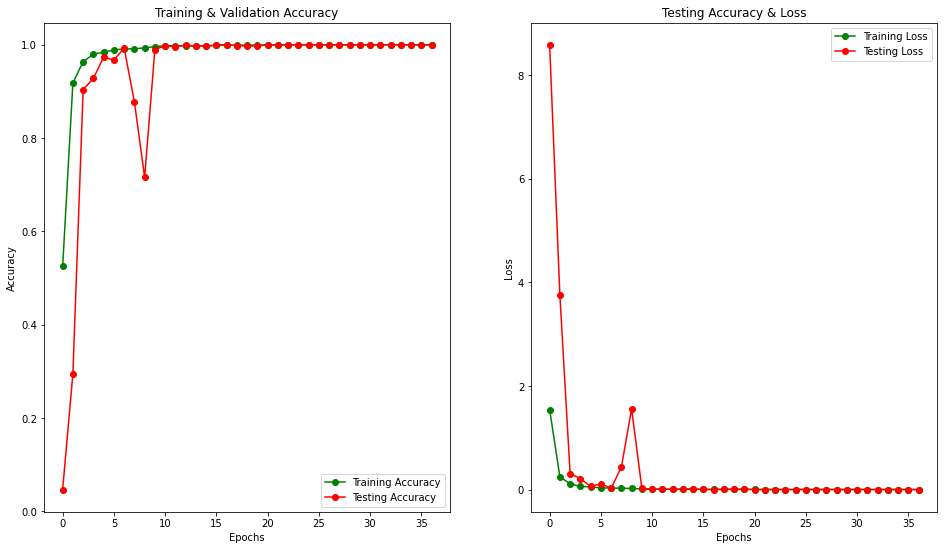

In [46]:
#plot the graphs for accuracy and loss in the training and validation set
epochs = [i for i in range(37)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(16,9)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()